<a href="https://colab.research.google.com/github/whj0406/2024-1-my-BDA/blob/main/inclass/05w_0402_tue_B_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%html
<!--마크다운 표 정렬 설정-->
<style> table {float:left} </style>

In [2]:
import pandas as pd
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

### 집단별로 요약하기

#### 전체 요약 통계량 구하기


In [3]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.56 MiB/s, done.


In [4]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
13,14,4,48,87,12


In [5]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [6]:
exam.agg(["mean", "median"])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [7]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


In [8]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [9]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [10]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0


In [11]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=1)

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


In [12]:
pd.Series([np.nan, np.nan, np.nan, 5]).mean()

5.0

In [13]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [14]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [15]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [16]:
df.agg("mean", axis="columns")

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [17]:
df.agg("mean", axis="index")

A    4.0
B    5.0
C    7.0
dtype: float64

In [18]:
df.agg(["sum", "mean"], axis="columns")


,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [19]:
df.agg(["sum", "mean"], axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


In [20]:
# nclass별로 분리하기
# math 평균 구하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [21]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [22]:
exam.groupby('nclass').mean()['math']

nclass
1    46.25
2    61.25
3    45.00
4    56.75
5    78.00
Name: math, dtype: float64

In [23]:
exam.groupby('nclass').mean()[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [24]:
# list of functions and/or function names, e.g. [np.sum, 'mean']
exam.groupby('nclass').agg("mean")

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [25]:
exam.groupby('nclass').agg(["mean", "median"])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [26]:
# 인자 사용 방법: 열 이름은 키워드인 반면, 값 ('열명', '함수명')은 열에서 값을 계산하는 데 사용되는 함수 이름
# 새_열이름 = ('열명', '함수명')
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [27]:
exam.groupby('nclass').agg(math = ('math', 'mean'))

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [28]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [29]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

------------------------------------------------------------------------

#### (알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [32]:
 # 시험 예상
exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [33]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


### DataFrameGroupBy 객체

In [34]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [35]:
exam.sample(5) # 임의의 행 수

,id,nclass,math,english,science
8,9,3,20,98,15
14,15,4,75,56,78
4,5,2,25,80,65
18,19,5,89,68,87
2,3,1,45,86,78


In [36]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
exam.groupby('nclass') # 객체 DataFrameGroupBy

In [38]:
list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [39]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [40]:
for key, value in exam.groupby('nclass'):
    print(key, "\n")
    print(type(value))
    print(value, "\n", "-"*40, "\n")

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

In [41]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


#2교시

---

### (알아 두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [42]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [43]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [44]:
exam.groupby('nclass')[['id']].count() # DataFrame

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [45]:
exam.groupby('nclass')['id'].count() # Series

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [46]:
exam.groupby('nclass').count()

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [47]:
exam.groupby('nclass').count()[['id']]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


### 집단별로 다시 집단 나누기

In [48]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [49]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [50]:
mpg.groupby(['manufacturer', 'category']).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer category                      
audi         compact        17.93     26.93
             midsize        16.00     24.00
chevrolet    2seater        15.40     24.80
             midsize        18.80     27.60
             suv            12.67     17.11
dodge        minivan        15.82     22.36
             pickup         12.05     16.11
             suv            11.86     16.00
ford         pickup         13.00     16.43
             subcompact     15.89     23.22
             suv            12.89     17.78
honda        subcompact     24.44     32.56
hyundai      midsize        19.00     27.71
             subcompact     18.29     26.00
jeep         suv            13.50     17.62
land rover   suv            11.50     16.50
lincoln      suv            11.33     17.00
mercury      suv            13.25     18.00
nissan       compact        20.00     28.00
             midsize        20.00     27.43
             suv            13.75     18.00
pontiac      midsize        17.00     26.40
subaru       compact        19.75     26.00
             subcompact     19.50     26.00
             suv            18.83     25.00
toyota       compact        22.25     30.58
             midsize        19.86     28.29
             pickup         15.57     19.43
             suv            14.38     18.25
volkswagen   compact        20.79     28.50
             midsize        18.57     27.57
             subcompact     24.00     32.83

In [51]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [52]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


In [53]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [54]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']]

,model
drv,
4,4
f,5
r,10


In [55]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']].rename(columns = {'model' : 'n'})

,n
drv,
4,4
f,5
r,10


------------------------------------------------------------------------

#### (알아 두면 좋아요) `value_counts()`로 집단별 빈도 간단하게 구하기

In [56]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [57]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [58]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [59]:
mpg['drv'].value_counts().query('n > 100') # 오류 발생

AttributeError: 'Series' object has no attribute 'query'

In [60]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [61]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')

,n
drv,
f,106
4,103


In [62]:
mpg['drv'].value_counts().to_frame('n') # 열 제목

,n
f,106
4,103
r,25


In [63]:
mpg['drv'].value_counts().to_frame('n').rename_axis('drv') # index의 제목 수정

,n
drv,
f,106
4,103
r,25


In [64]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [65]:
mpg.groupby('drv').agg(n = ('drv', 'count')).query('n > 100')

,n
drv,
4,103
f,106


In [66]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


------------------------------------------------------------------------

### `pandas` 함수 조합하기

In [67]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


## 혼자서 해보기

In [68]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('category').agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.40
compact,20.13
midsize,18.76
minivan,15.82
pickup,13.00
subcompact,20.37
suv,13.50


In [69]:
mpg.groupby('category').agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending = False)


,mean_cty
category,
subcompact,20.37
compact,20.13
midsize,18.76
minivan,15.82
2seater,15.40
suv,13.50
pickup,13.00


In [70]:
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
manufacturer,
audi,26.44
chevrolet,21.89
dodge,17.95
ford,19.36
honda,32.56
hyundai,26.86
jeep,17.62
land rover,16.50
lincoln,17.00


In [71]:
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean')).sort_values('mean_hwy', ascending = False).head(3)

,mean_hwy
manufacturer,
honda,32.56
volkswagen,29.22
hyundai,26.86


In [72]:
mpg.query('category == "compact"').groupby('manufacturer').agg(n = ('manufacturer', 'count'))

,n
manufacturer,
audi,15
nissan,2
subaru,4
toyota,12
volkswagen,14


In [73]:
mpg.query('category == "compact"').groupby('manufacturer') \
   .agg(n = ('manufacturer', 'count')).sort_values('n', ascending = False).head(3)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12


In [74]:
mpg.query('category == "compact"').value_counts('manufacturer').to_frame('n')

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [75]:
mpg.query('category == "compact"').value_counts('manufacturer').to_frame('n').sort_values('n', ascending = False)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [76]:
# 시험 예상
mpg.groupby(['manufacturer', 'category']) \
  .agg(mean_cty = ('cty', 'mean')) \
  .sort_values('mean_cty', ascending = False)

mean_cty
manufacturer category            
honda        subcompact     24.44
volkswagen   subcompact     24.00
toyota       compact        22.25
volkswagen   compact        20.79
nissan       compact        20.00
             midsize        20.00
toyota       midsize        19.86
subaru       compact        19.75
             subcompact     19.50
hyundai      midsize        19.00
subaru       suv            18.83
chevrolet    midsize        18.80
volkswagen   midsize        18.57
hyundai      subcompact     18.29
audi         compact        17.93
pontiac      midsize        17.00
audi         midsize        16.00
ford         subcompact     15.89
dodge        minivan        15.82
toyota       pickup         15.57
chevrolet    2seater        15.40
toyota       suv            14.38
nissan       suv            13.75
jeep         suv            13.50
mercury      suv            13.25
ford         pickup         13.00
             suv            12.89
chevrolet    suv            12.67
dodge        pickup         12.05
             suv            11.86
land rover   suv            11.50
lincoln      suv            11.33

---

## 06-7 데이터 합치기

### 가로로 합치기 merge(): 행의 선택은?

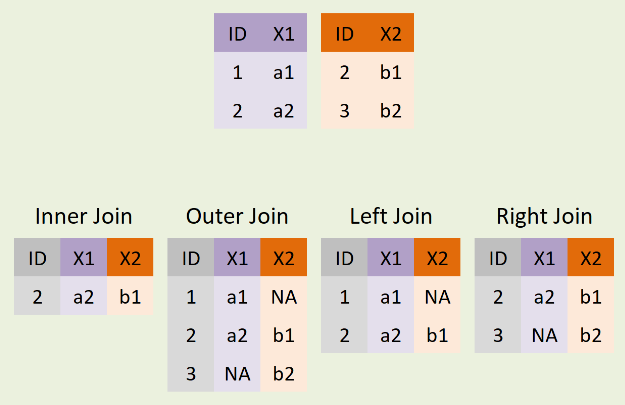

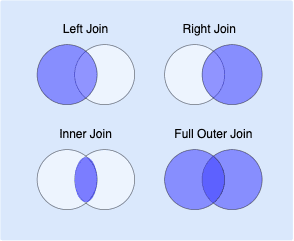

In [78]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [79]:
test1  # test1 출력

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [80]:
test2  # test2 출력

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [81]:
# id 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how = 'left', on = 'id')
total


,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [82]:
total = pd.merge(test1, test2, how = 'left')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [83]:
total = pd.merge(test1, test2)
total


,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


#### 다른 데이터를 활용해 변수 추가하기

In [84]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [85]:
exam.sample(5)

,id,nclass,math,english,science
16,17,5,65,68,98
18,19,5,89,68,87
17,18,5,80,78,90
15,16,4,58,98,65
7,8,2,90,78,25


In [86]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [87]:
exam_new = pd.merge(exam, name, how = 'left')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기: concat()

In [88]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [89]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [90]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [91]:
# 데이터 합쳐서 group_all에 할당
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [92]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
group_all.reset_index() # 원 index가 열로 이동, 새로운 시퀀스 지정

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [94]:
group_all.reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### [공식 매뉴얼 문서](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge)

In [95]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [96]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [97]:
# key 및 rkey 열에 df1 및 df2를 병합, 공통 키가 다른 경우
# 값 열에는 기본 접미사인 _x 및 _y가 추가
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [98]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrames df1 및 df2를 병합 .
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


#정리하기

In [114]:

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
